# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [145]:
import pandas as pd

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [146]:
df = pd.read_csv('https://raw.githubusercontent.com/tfilushandy/DATA-MINING-W4-NEW---THEO-FILUS/refs/heads/main/penguins_size.csv')
df.sample(n=10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
182,Chinstrap,Dream,40.9,16.6,187.0,3200.0,FEMALE
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,MALE
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,MALE
75,Adelie,Torgersen,42.8,18.5,195.0,4250.0,MALE
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,MALE
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,FEMALE
287,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,MALE
199,Chinstrap,Dream,49.0,19.6,212.0,4300.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [148]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [149]:
col_names = ('species','island','sex')

for col in col_names:
  print(df[col].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


5. Drop the null column(s)

In [150]:
df.dropna(inplace=True)
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [151]:
df.loc[df['sex'] == '.','sex'] = 'FEMALE'

In [152]:
df.loc[336]

,336
species,Gentoo
island,Biscoe
culmen_length_mm,44.5
culmen_depth_mm,15.7
flipper_length_mm,217.0
body_mass_g,4875.0
sex,FEMALE


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [153]:
df[df['species'] == 'Gentoo' ].groupby('sex').describe().transpose()

sex                           FEMALE         MALE
culmen_length_mm  count    59.000000    61.000000
                  mean     45.545763    49.473770
                  std       2.038197     2.720594
                  min      40.900000    44.400000
                  25%      43.900000    48.100000
                  50%      45.500000    49.500000
                  75%      46.850000    50.500000
                  max      50.500000    59.600000
culmen_depth_mm   count    59.000000    61.000000
                  mean     14.262712    15.718033
                  std       0.568391     0.741060
                  min      13.100000    14.100000
                  25%      13.800000    15.200000
                  50%      14.300000    15.700000
                  75%      14.600000    16.100000
                  max      15.700000    17.300000
flipper_length_mm count    59.000000    61.000000
                  mean    212.779661   221.540984
                  std       3.904320     5.673252
                  min     203.000000   208.000000
                  25%     210.000000   218.000000
                  50%     212.000000   221.000000
                  75%     215.500000   225.000000
                  max     222.000000   231.000000
body_mass_g       count    59.000000    61.000000
                  mean   4683.050847  5484.836066
                  std     280.295437   313.158596
                  min    3950.000000  4750.000000
                  25%    4475.000000  5300.000000
                  50%    4700.000000  5500.000000
                  75%    4875.000000  5700.000000
                  max    5200.000000  6300.000000

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [154]:
df.loc[336]

,336
species,Gentoo
island,Biscoe
culmen_length_mm,44.5
culmen_depth_mm,15.7
flipper_length_mm,217.0
body_mass_g,4875.0
sex,FEMALE


7. Create your own insightful visualization and explain it in at least 2 sentences

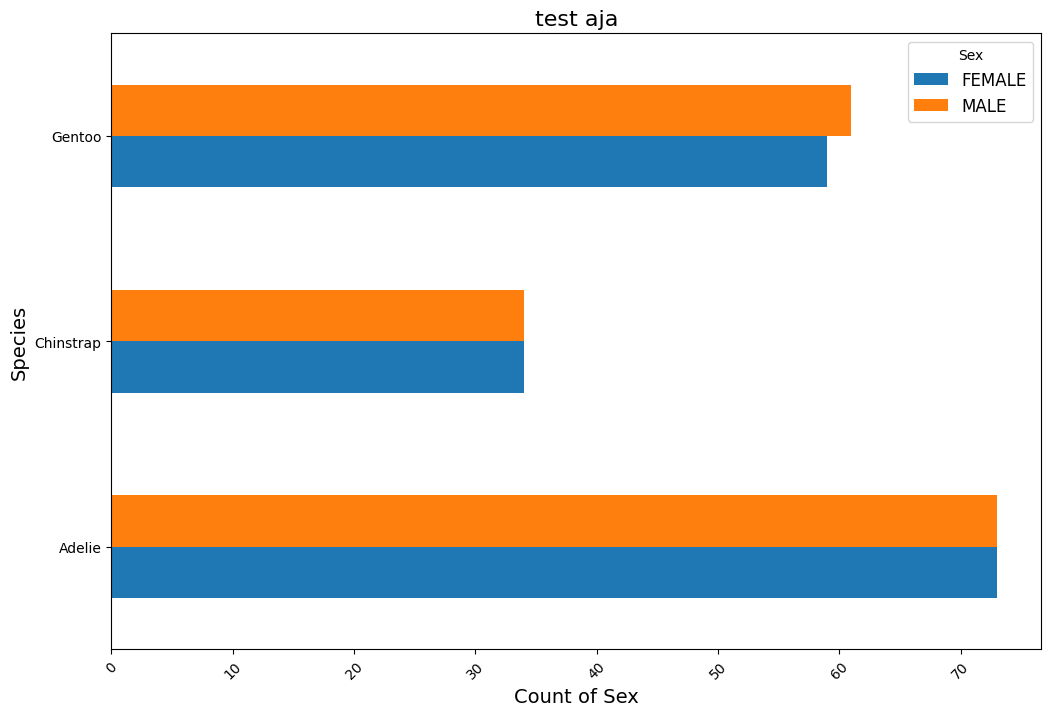

In [155]:
import matplotlib.pyplot as plt

# Group data by major and admission status, then count the occurrences
admission_major_counts = df.groupby(['species', 'sex']).size().unstack(fill_value=0)

# Create a horizontal bar chart
# Membuat horizontal bar chart
admission_major_counts.plot(kind='barh', stacked=False, figsize=(12, 8))

# Customize the chart
plt.title('test aja', fontsize=16)
plt.xlabel('Count of Sex', fontsize=14)
plt.ylabel('Species', fontsize=14)
plt.legend(title='Sex', fontsize=12)
plt.xticks(rotation=45)

# Show the chartimport pandas as pd
plt.show()


Dalam data set ini ada 3 Species dan 2 Sex. Species Chinstrap mempunyai jumlah species paling sedikit dan Jumlah Male dan Female yang sama sedangkan Gentoo menjadi jumlah spesies terbanyak kedua dengan jumlah Male lebih banyak daripada Female.

8. Check unique value of our target variable

In [156]:
for column in ['species']:
  print(df[column].unique())

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [157]:
island_map = {'Dream' : 1, 'Torgersen' : 2, 'Biscoe' : 3 }
sex_map = {'FEMALE' : 0, 'MALE' : 1}

df['island'] = df['island'].map(island_map)
df['sex'] = df['sex'].map(sex_map)


In [158]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


10. encode the target column and display the results
Chinstrap, Adélie, or Gentoo

In [159]:
species_map = {'Chinstrap' : 2, 'Adelie' : 0, 'Gentoo' : 1}

df['species'] = df['species'].map(species_map)

In [85]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


11. create a heatmap to see the correlation and explain the conclusion

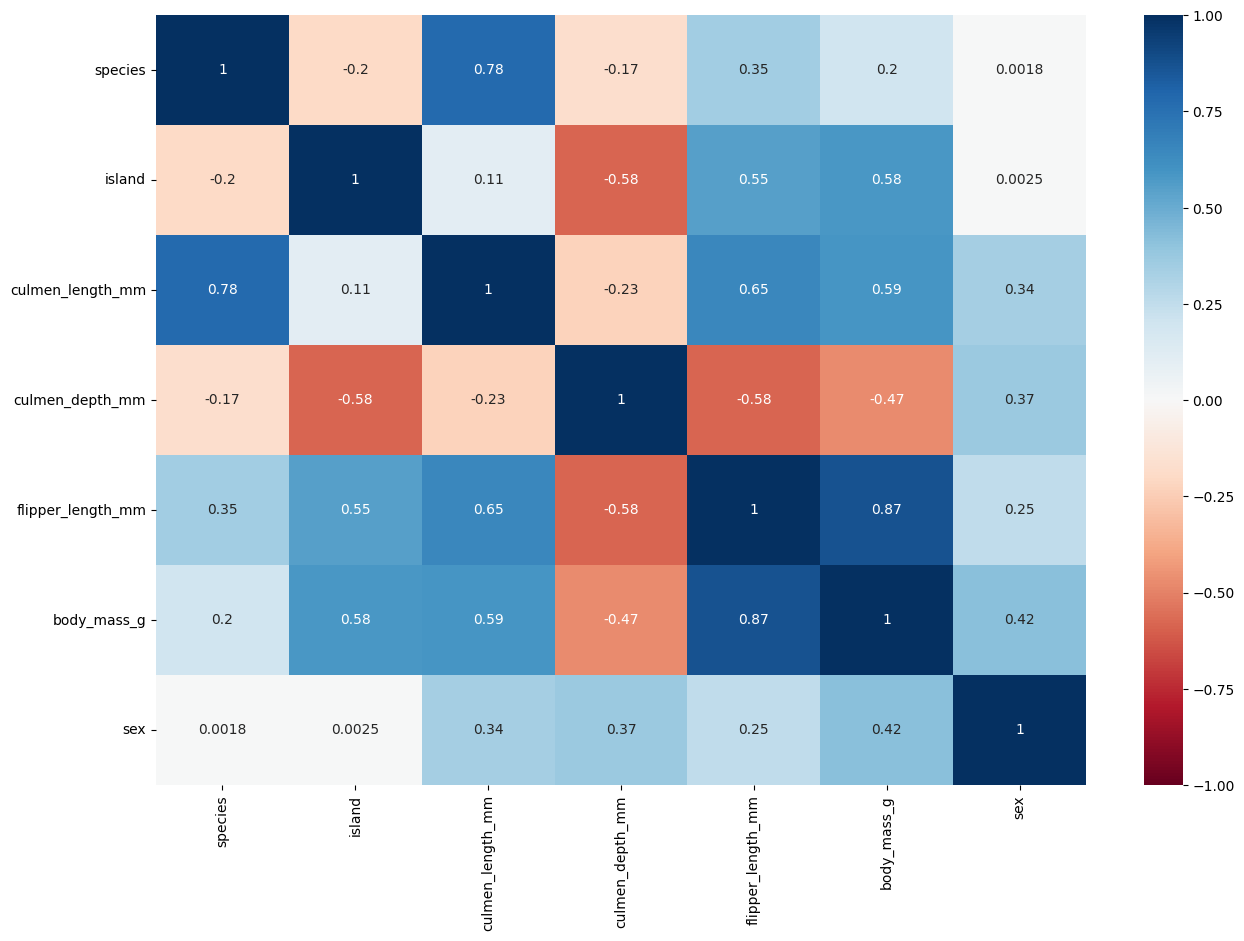

In [160]:
import seaborn  as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='RdBu',
vmin=-1, vmax=1, annot=True)
plt.show()

## Machine Learning

1. Splitting X and y

In [161]:
X = df.drop(['species'], axis = 1) ## 1 itu column. 0 itu row

y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [121]:
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [164]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [123]:
y_pred_en = clf_en.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


In [166]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9850
Test set score: 1.0000


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 97, 55]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 1.0, 50.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 0, 1]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 0, 1]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\nentropy = 0.736\nsamples = 59\nvalue = [9, 1, 49]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.239\nsamples = 51\nvalue = [2, 0, 49]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 96.0, 5.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 96, 0]'),
 Text(0.83

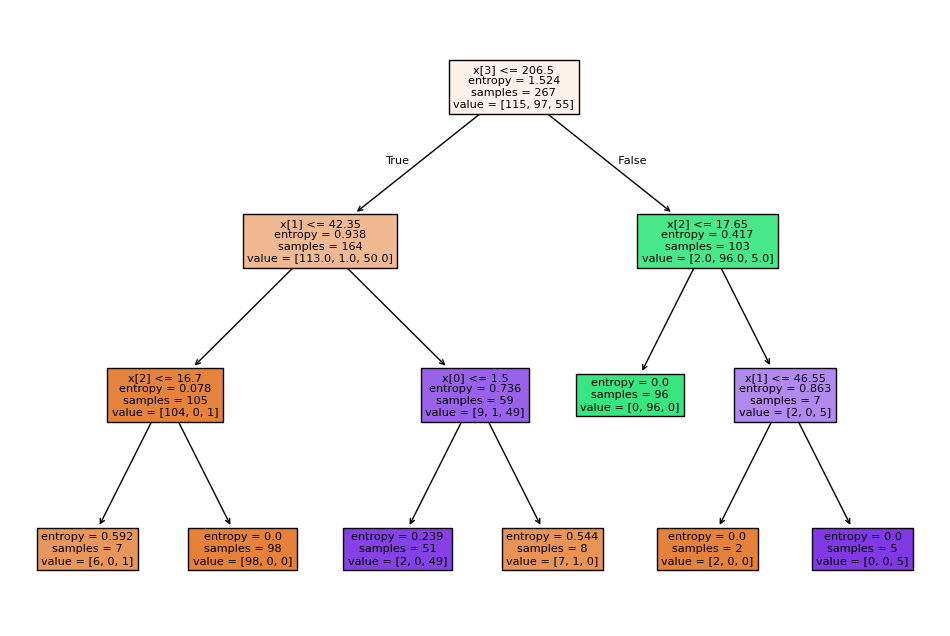

In [167]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

2. Criterion Gini index

In [168]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [169]:
y_pred_gini = clf_gini.predict(X_test)

In [170]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index 0.9851


In [171]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9775
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 97, 55]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 1.0, 50.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 0, 4]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 0, 1]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 0, 3]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 1, 46]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.042\nsamples = 47\nvalue = [1, 0, 46]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 96.0, 5.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 96, 0]'),
 Text(0.8333333333333334, 0.375, 'x[1

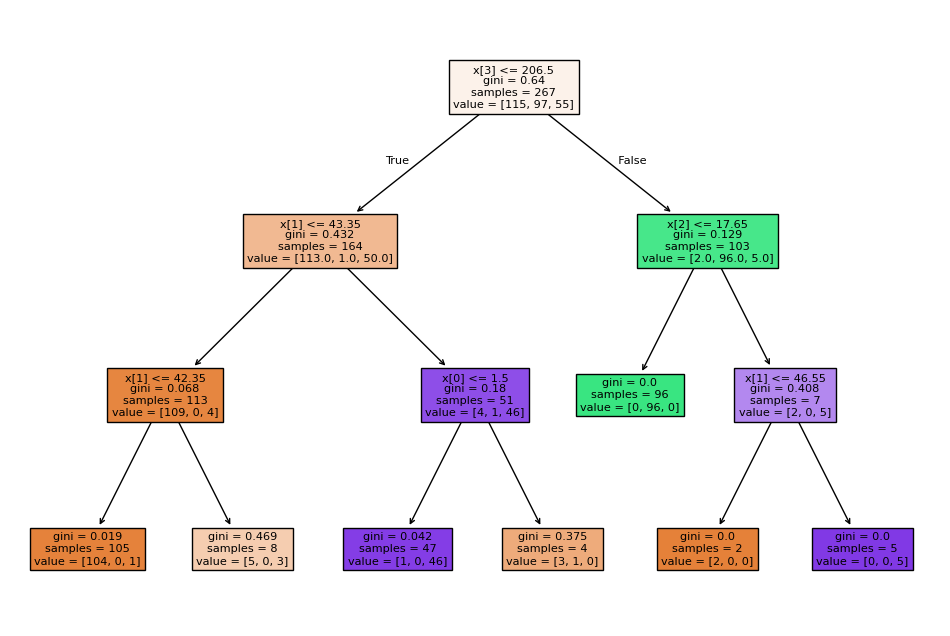

In [172]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [178]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_en are defined
cm = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix:")
print(cm)
print("Confusion Matrix Index:")
print(cm)

Confusion Matrix:
[[31  0  0]
 [ 0 23  0]
 [ 0  0 13]]
Confusion Matrix Index:
[[31  0  0]
 [ 0 23  0]
 [ 0  0 13]]


In [181]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        13

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [182]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit (X_train, y_train)

GaussianNB()

In [184]:
nb_y_pred = nb_classifier.predict(X_test)

In [189]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, nb_y_pred)
accuracy = accuracy_score(y_test, nb_y_pred)

# Print the results
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[30  0  1]
 [ 0 23  0]
 [ 0  0 13]]
Accuracy Score: 0.9850746268656716


In [190]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       1.00      1.00      1.00        23
           2       0.93      1.00      0.96        13

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Good Luck :)